In [241]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. 

You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. 

Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. 

Here are the steps to complete it:

Load the dataset ../data/housing-data.csv

plot the histograms for each feature

create 2 variables called X and y: 

    X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
    
create a linear regression model in Keras with the appropriate number of inputs and output

split the data into train and test with a 20% test size

train the model on the training set and check its accuracy on training and test set

how's your model doing? Is the loss growing smaller?

try to improve your model with these experiments:

normalize the input features with one of the rescaling techniques mentioned above

use a different value for the learning rate of your model

use a different optimizer

once you're satisfied with training, check the R2score on the test set


In [207]:
df = pd.read_csv("../data/housing-data.csv")
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [208]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


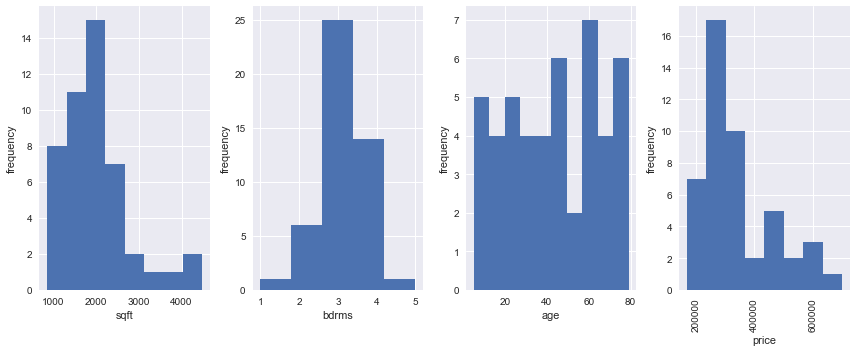

In [209]:
#df['sqft'].plot(kind='hist', bins=8,figsize=(8,6))
f, ax = plt.subplots(1,4, sharex=False, sharey=False,figsize=(12,5))
ax[0].hist(df['sqft'], bins=8)
ax[0].set_xlabel("sqft")
ax[0].set_ylabel("frequency")
ax[1].hist(df['bdrms'], bins=5)
ax[1].set_xlabel("bdrms")
ax[1].set_ylabel("frequency")
ax[2].hist(df['age'], bins=10)
ax[2].set_xlabel("age")
ax[2].set_ylabel("frequency")
ax[3].hist(df['price'], bins=8)
for tick in ax[3].get_xticklabels():
        tick.set_rotation(90)
ax[3].set_xlabel("price")
ax[3].set_ylabel("frequency")
plt.tight_layout()

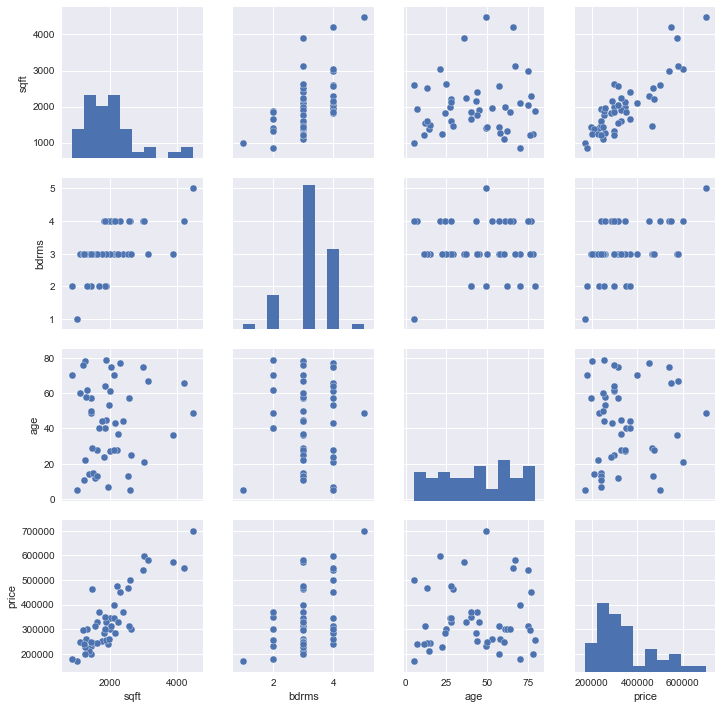

In [210]:
sns.pairplot(df)

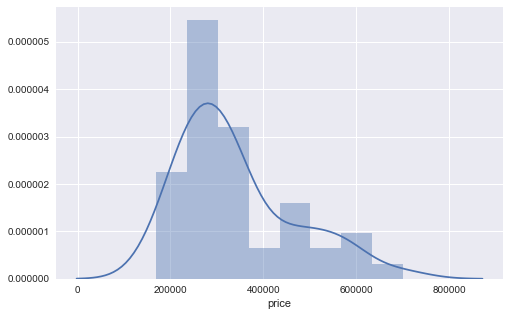

In [211]:
plt.figure(figsize=(8,5))
sns.distplot(df['price'])

In [212]:
X = df[['sqft', 'bdrms','age']].values
y = df['price'].values

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
lm = LinearRegression()

In [215]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [216]:
print(lm.intercept_)
print(lm.coef_)

85504.1062192
[   143.34116695 -13537.65106075    -21.00899506]


In [217]:
y_pred = lm.predict(X_test)

In [218]:
print("MAE: " + str(mean_absolute_error(y_test, y_pred)))
print("MSE: " + str(mean_squared_error(y_test, y_pred)))
print("RMSE: " + str(np.sqrt(mean_squared_error(y_test, y_pred))))
print("R squared (explained variance): " + str(explained_variance_score(y_test, y_pred)))
print("R2 score: " + str(r2_score(y_test, y_pred)))

MAE: 72373.3849524
MSE: 8604733613.06
RMSE: 92761.7033752
R squared (explained variance): 0.69274992064
R2 score: 0.515205510878


In [224]:
def build_logistic_regression_model(input_shape, output_shape):
    model = Sequential()
    model.add(Dense(output_shape, input_shape=(input_shape,), activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'mean_squared_error')
    return(model)

In [225]:
lrmodel = build_logistic_regression_model(3,1)
lrmodel.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
47/47 [==============================] - 0s - loss: 131182418050.7234     
Epoch 2/100
47/47 [==============================] - 0s - loss: 131182419445.1064     
Epoch 3/100
47/47 [==============================] - 0s - loss: 131182419619.4043     
Epoch 4/100
47/47 [==============================] - 0s - loss: 131182413344.6808     
Epoch 5/100
47/47 [==============================] - 0s - loss: 131182412996.0851     
Epoch 6/100
47/47 [==============================] - 0s - loss: 131182412124.5957     
Epoch 7/100
47/47 [==============================] - 0s - loss: 131182412124.5957     
Epoch 8/100
47/47 [==============================] - 0s - loss: 131182412124.5957     
Epoch 9/100
47/47 [==============================] - 0s - loss: 131182420665.1915     
Epoch 10/100
47/47 [==============================] - 0s - loss: 131182415261.9574     
Epoch 11/100
47/47 [==============================] - 0s - loss: 131182411950.2979     
Epoch 12/100
47/47 [=====================

In [226]:
y_train_pred = lrmodel.predict(X_train)
y_test_pred = lrmodel.predict(X_test)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	-7.886
The R2 score on the Test set is:	-9.205


In [227]:
print("The MSE on the train set is {}".format(mse(y_train, y_train_pred)))
print("The MSE on the test set is {}".format(mse(y_test, y_test_pred)))

The MSE on the train set is 117681966958.13513
The MSE on the test set is 181134074581.3


In [228]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [229]:
scaler = StandardScaler()
df['sqft_ss'] = scaler.fit_transform(df['sqft'])
df['age_ss'] = scaler.fit_transform(df['age'])
df['price_ss'] =  scaler.fit_transform(df['price'])

/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda3/envs/ztdl/lib

In [230]:
df.head()

,sqft,bdrms,age,price,sqft_ss,age_ss,price_ss
0,2104,3,70,399900,0.131415,1.204453,0.480890
1,1600,3,28,329900,-0.509641,-0.651589,-0.084983
2,2400,3,44,369000,0.507909,0.055474,0.231097
3,1416,2,49,232000,-0.743677,0.276432,-0.876398
4,3000,4,75,539900,1.271071,1.425410,1.612637


In [231]:
def build_logistic_regression_model(input_shape, output_shape):
    model = Sequential()
    model.add(Dense(output_shape, input_shape=(input_shape,), activation='sigmoid'))
    model.compile(Adam(lr=0.1), 'mean_squared_error')
    return(model)

In [232]:
X = df[['sqft_ss', 'bdrms','age_ss']].values
y = df['price_ss'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
lrmodel = build_logistic_regression_model(3,1)
lrmodel.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
47/47 [==============================] - 0s - loss: 1.8488     
Epoch 2/100
47/47 [==============================] - 0s - loss: 1.7172     
Epoch 3/100
47/47 [==============================] - 0s - loss: 1.4623     
Epoch 4/100
47/47 [==============================] - 0s - loss: 1.2377     
Epoch 5/100
47/47 [==============================] - 0s - loss: 0.9717     
Epoch 6/100
47/47 [==============================] - 0s - loss: 0.8294     
Epoch 7/100
47/47 [==============================] - 0s - loss: 0.7398     
Epoch 8/100
47/47 [==============================] - 0s - loss: 0.7210     
Epoch 9/100
47/47 [==============================] - 0s - loss: 0.7167     
Epoch 10/100
47/47 [==============================] - 0s - loss: 0.7145     
Epoch 11/100
47/47 [==============================] - 0s - loss: 0.7082     
Epoch 12/100
47/47 [==============================] - 0s - loss: 0.7001     
Epoch 13/100
47/47 [==============================] - 0s - loss: 0.6867     
Epoch 14

In [234]:
y_train_pred = lrmodel.predict(X_train)
y_test_pred = lrmodel.predict(X_test)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))
print("The MSE on the train set is {}".format(mse(y_train, y_train_pred)))
print("The MSE on the test set is {}".format(mse(y_test, y_test_pred)))

The R2 score on the Train set is:	0.297
The R2 score on the Test set is:	0.535
The MSE on the train set is 0.608388121294483
The MSE on the test set is 0.5389416923945488


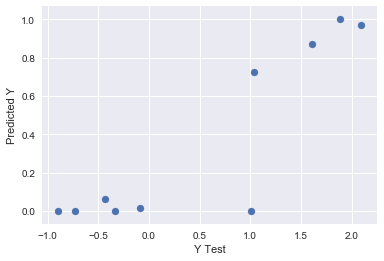

In [235]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [437]:
df = pd.read_csv("../data/HR_comma_sep.csv")

In [438]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [439]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [441]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [442]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [443]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

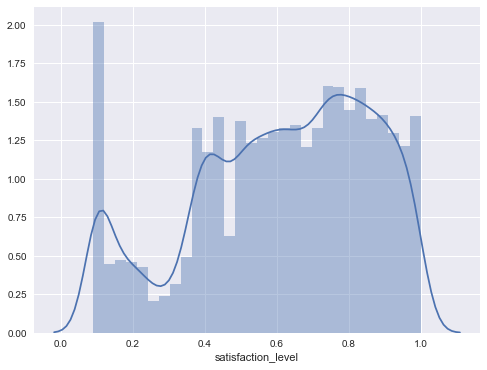

In [444]:
plt.figure(figsize=(8,6))
sns.distplot(df['satisfaction_level'])

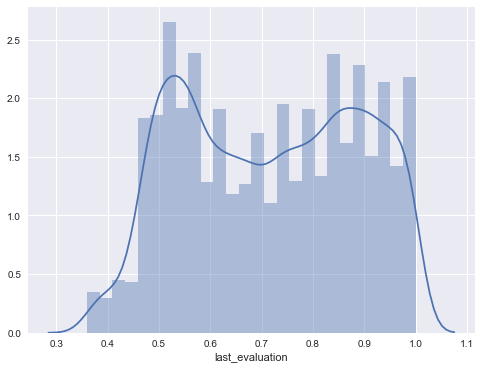

In [445]:
plt.figure(figsize=(8,6))
sns.distplot(df['last_evaluation'])

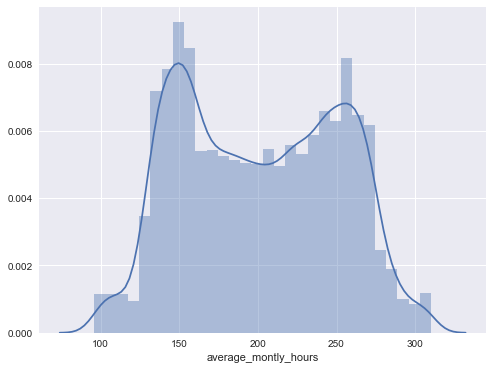

In [446]:
plt.figure(figsize=(8,6))
sns.distplot(df['average_montly_hours'])

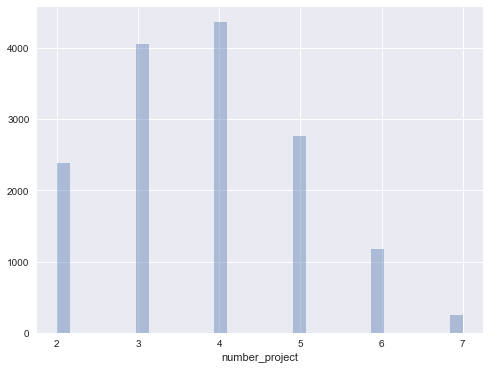

In [447]:
plt.figure(figsize=(8,6))
sns.distplot(df['number_project'], kde=False)

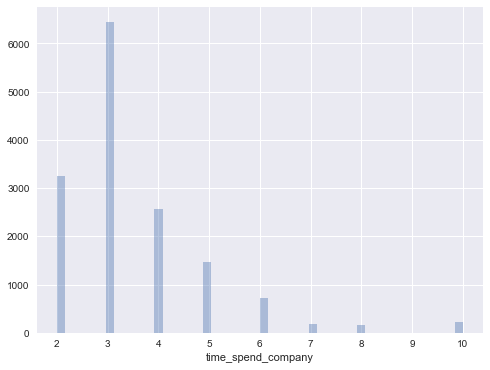

In [448]:
plt.figure(figsize=(8,6))
sns.distplot(df['time_spend_company'], kde=False)

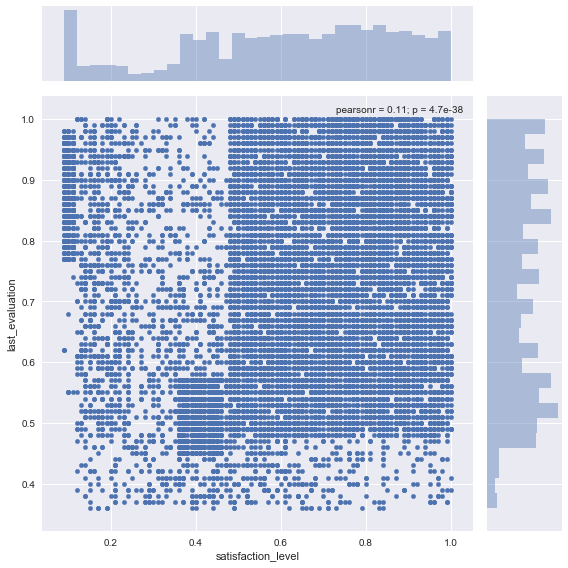

In [449]:
plt.figure(figsize=(12,10))
sns.jointplot(x=df['satisfaction_level'], y=df['last_evaluation'], size=8, s=20)

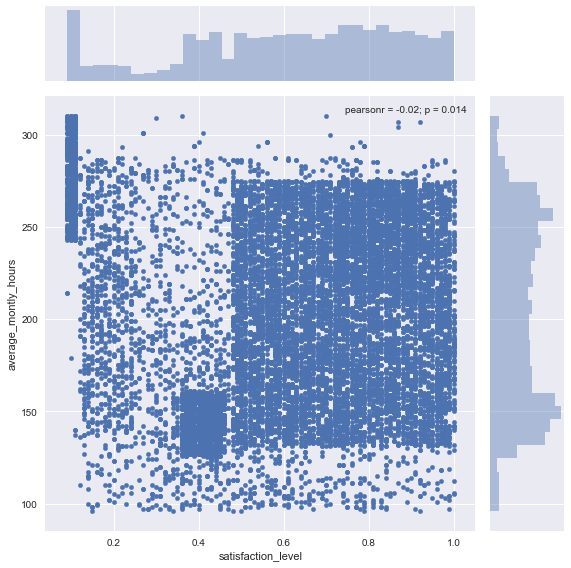

In [450]:
plt.figure(figsize=(12,10))
sns.jointplot(x=df['satisfaction_level'], y=df['average_montly_hours'], size=8, s=20)

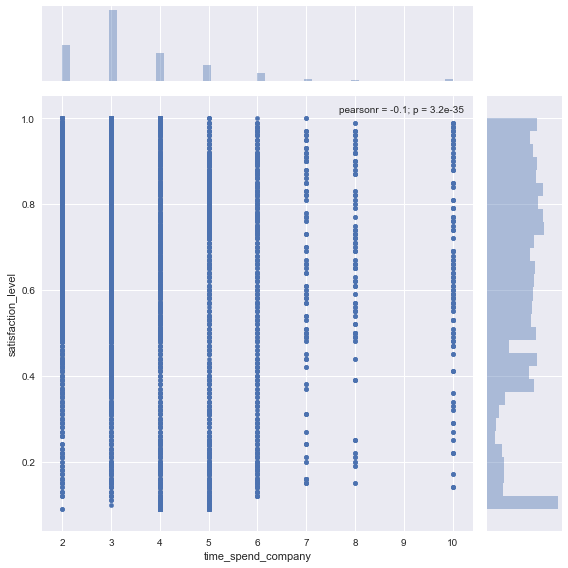

In [451]:
plt.figure(figsize=(12,10))
sns.jointplot(x=df['time_spend_company'], y=df['satisfaction_level'], size=8, s=20)

In [453]:
# Establish a benchmark: what would be your accuracy score if you predicted everyone stay?

df.left.value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [455]:
df['left'].value_counts()/len(df) * 100

0    76.191746
1    23.808254
Name: left, dtype: float64

In [456]:
#pd.get_dummies(df['Gender'], prefix='Gender').head()
#df.tail()
print(df['sales'].unique())
print(df['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [457]:
sales = pd.get_dummies(df['sales'], prefix="sales")

In [458]:
salary = pd.get_dummies(df['salary'], prefix="salary")

In [287]:
#pd.concat([df, sales, salary], axis=1)

In [288]:
#df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [461]:
df = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours', 'left']], 
           sales, salary], axis=1)

In [462]:
df.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,average_montly_hours,left,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,3,0,0,157,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,6,0,0,262,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,4,0,0,272,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,5,0,0,223,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,3,0,0,159,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [463]:
df['average_montly_hours'] = MinMaxScaler().fit_transform(df['average_montly_hours'])

/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [464]:
df.tail()

,satisfaction_level,last_evaluation,number_project,time_spend_company,Work_accident,promotion_last_5years,average_montly_hours,left,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
14994,0.40,0.57,2,3,0,0,0.257009,1,0,0,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,3,0,0,0.299065,1,0,0,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,3,0,0,0.219626,1,0,0,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,4,0,0,0.859813,1,0,0,...,0,0,0,0,0,1,0,0,1,0
14998,0.37,0.52,2,3,0,0,0.289720,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [465]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'Work_accident', 'promotion_last_5years',
       'average_montly_hours', 'left', 'sales_IT', 'sales_RandD',
       'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing',
       'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical',
       'salary_high', 'salary_low', 'salary_medium'],
      dtype='object')

In [525]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'Work_accident', 'promotion_last_5years',
       'average_montly_hours', 'sales_IT', 'sales_RandD', 'sales_accounting',
       'sales_hr', 'sales_management', 'sales_marketing', 'sales_product_mng',
       'sales_sales', 'sales_support', 'sales_technical', 'salary_high',
       'salary_low', 'salary_medium']].values
y = df['left'].values

In [467]:
X.shape

(14999, 20)

In [468]:
y.shape

(14999,)

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [571]:
# Dummy Classifier compare to benchmark above and results below
from sklearn.dummy import DummyClassifier

In [582]:
dummy = DummyClassifier(strategy='stratified', random_state=42)

In [583]:
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=42, strategy='stratified')

In [584]:
dummy_pred = dummy.predict(X_test)

In [585]:
confusion_matrix(y_test, dummy_pred)

array([[1745,  549],
       [ 529,  177]])

In [586]:
print(classification_report(y_test, dummy_pred))

             precision    recall  f1-score   support

          0       0.77      0.76      0.76      2294
          1       0.24      0.25      0.25       706

avg / total       0.64      0.64      0.64      3000



In [470]:
lr = LogisticRegression(C=10, penalty='l1')
lr.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [471]:
predictions = lr.predict(X_test)

In [472]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.82      0.92      0.87      2294
          1       0.57      0.34      0.42       706

avg / total       0.76      0.78      0.76      3000



In [473]:
confusion_matrix(y_test, predictions)

array([[2116,  178],
       [ 469,  237]])

In [474]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [363]:
2116 + 237 + 469 + 178 

3000

In [366]:
len(df)*0.2

2999.8

In [368]:
2353/3000

0.7843333333333333

In [475]:
df.shape

(14999, 21)

In [476]:
def build_model(optimizer,input_shape, units, activation, loss, metrics):
    model = Sequential()
    model.add(Dense(units=units, input_shape=input_shape, activation=activation))
    model.compile(optimizer=optimizer, loss=loss, metrics=[metrics])
    model.summary()
    return(model)

In [533]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return(model)

In [534]:
#model = build_model(SGD(lr=0.5), (20,), 1, 'sigmoid', 'binary_crossentropy', 'accuracy')
model = build_logistic_regression_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [535]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [536]:
y_pred = model.predict_classes(X_test)

  32/3000 [..............................] - ETA: 16s

In [537]:
confusion_matrix(y_test, y_pred)

array([[1864,  430],
       [ 254,  452]])

In [538]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.81      0.84      2294
          1       0.51      0.64      0.57       706

avg / total       0.79      0.77      0.78      3000



In [539]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=10, verbose=0)

In [540]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
______________________

In [541]:
scores

array([ 0.79066667,  0.781     ,  0.75866667,  0.78      ,  0.76225408])

In [542]:
# This model is not very good as it does no better than the "benchmark" 

In [486]:
model = build_model(SGD(lr=0.1), (20,), 1, 'sigmoid', 'binary_crossentropy', 'accuracy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [487]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [488]:
y_pred = model.predict_classes(X_test)

  32/3000 [..............................] - ETA: 12s

In [489]:
confusion_matrix(y_test, y_pred)

array([[2175,  119],
       [ 565,  141]])

In [490]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.95      0.86      2294
          1       0.54      0.20      0.29       706

avg / total       0.73      0.77      0.73      3000



In [511]:
model = build_model(Adam(lr=0.5), (20,), 1, 'sigmoid', 'binary_crossentropy', 'accuracy')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [512]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [513]:
y_pred = model.predict_classes(X_test)

  32/3000 [..............................] - ETA: 15s

In [514]:
confusion_matrix(y_test, y_pred)

array([[1933,  361],
       [ 304,  402]])

In [515]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.84      0.85      2294
          1       0.53      0.57      0.55       706

avg / total       0.78      0.78      0.78      3000



In [518]:
model = KerasClassifier(build_fn=build_model(Adam(lr=0.5), (20,), 1, 'sigmoid', 'binary_crossentropy', 'accuracy'),
                        epochs=100, verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [544]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
______________________

In [545]:
scores

array([ 0.80033333,  0.77833333,  0.56766667,  0.77633333,  0.77692564])

In [546]:
# This model is not very good and really does no better than the "benchmark".
# Go back to sklearn and try an SVM or other model

In [547]:
from sklearn.svm import SVC

In [548]:
model = SVC()

In [549]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [550]:
print(confusion_matrix(y_test,predictions))

[[2116  178]
 [ 469  237]]


In [551]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.92      0.87      2294
          1       0.57      0.34      0.42       706

avg / total       0.76      0.78      0.76      3000



In [552]:
from sklearn.model_selection import GridSearchCV

In [553]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [554]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [555]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] kernel=rbf, gamma=1, C=0.1 ......................................
[CV] ....... kernel=rbf, gamma=1, C=0.1, score=0.933500, total=   1.3s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] ....... kernel=rbf, gamma=1, C=0.1, score=0.935250, total=   1.3s
[CV] kernel=rbf, gamma=1, C=0.1 ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.9s remaining:    0.0s


[CV] ....... kernel=rbf, gamma=1, C=0.1, score=0.937484, total=   1.3s
[CV] kernel=rbf, gamma=0.1, C=0.1 ....................................
[CV] ..... kernel=rbf, gamma=0.1, C=0.1, score=0.911250, total=   1.1s
[CV] kernel=rbf, gamma=0.1, C=0.1 ....................................
[CV] ..... kernel=rbf, gamma=0.1, C=0.1, score=0.905000, total=   1.1s
[CV] kernel=rbf, gamma=0.1, C=0.1 ....................................
[CV] ..... kernel=rbf, gamma=0.1, C=0.1, score=0.915479, total=   1.2s
[CV] kernel=rbf, gamma=0.01, C=0.1 ...................................
[CV] .... kernel=rbf, gamma=0.01, C=0.1, score=0.761500, total=   1.9s
[CV] kernel=rbf, gamma=0.01, C=0.1 ...................................
[CV] .... kernel=rbf, gamma=0.01, C=0.1, score=0.761250, total=   1.9s
[CV] kernel=rbf, gamma=0.01, C=0.1 ...................................
[CV] .... kernel=rbf, gamma=0.01, C=0.1, score=0.761940, total=   2.2s
[CV] kernel=rbf, gamma=0.001, C=0.1 ..................................
[CV] .

[CV] ...... kernel=rbf, gamma=1, C=1000, score=0.963500, total=   0.6s
[CV] kernel=rbf, gamma=1, C=1000 .....................................
[CV] ...... kernel=rbf, gamma=1, C=1000, score=0.964500, total=   0.5s
[CV] kernel=rbf, gamma=1, C=1000 .....................................
[CV] ...... kernel=rbf, gamma=1, C=1000, score=0.960740, total=   0.6s
[CV] kernel=rbf, gamma=0.1, C=1000 ...................................
[CV] .... kernel=rbf, gamma=0.1, C=1000, score=0.958250, total=   1.8s
[CV] kernel=rbf, gamma=0.1, C=1000 ...................................
[CV] .... kernel=rbf, gamma=0.1, C=1000, score=0.962000, total=   2.1s
[CV] kernel=rbf, gamma=0.1, C=1000 ...................................
[CV] .... kernel=rbf, gamma=0.1, C=1000, score=0.959990, total=   1.9s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] ... kernel=rbf, gamma=0.01, C=1000, score=0.953250, total=   1.4s
[CV] kernel=rbf, gamma=0.01, C=1000 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [556]:
grid.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [557]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [567]:
grid.score(X, y)

0.99093272884858996

In [570]:
grid.score(X_train, y_train)

0.99649970830902579

In [569]:
grid.score(X_test, y_test)

0.96866666666666668

In [558]:
grid_predictions = grid.predict(X_test)

In [559]:
print(confusion_matrix(y_test,grid_predictions))

[[2239   55]
 [  39  667]]


In [560]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      2294
          1       0.92      0.94      0.93       706

avg / total       0.97      0.97      0.97      3000

